In [65]:
import os
import paltas
from astropy.visualization import simple_norm
import visualization_utils
from paltas import generate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

import paltas.Sampling.distributions as dist
from scipy.stats import norm, truncnorm, uniform
import matplotlib.pyplot as plt


%matplotlib inline
root_path = paltas.__path__[0][:-7]
import re

In [66]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### paltas PSF library

In [67]:
# psf_im = np.load('data/psf_images.npy', mmap_mode='r+')

In [68]:
# psf_im_i = psf_im[:, 1, :, :]

In [69]:
# # index = np.random.randint(0, psf_im_i.shape[0])
# index = 0
# psf_kernels = psf_im_i[index, :, :]
# psf_kernels[psf_kernels<0] = 0
# plt.imshow(psf_kernels);

In [70]:
# psf_sums = np.sum(psf_im_i,axis=(1,2))

In [71]:
# psf_sums = psf_sums.reshape(-1,1,1)

In [72]:
# normalized = psf_im_i/psf_sums
# normalized

In [73]:
# import tensorflow as tf
# normalized = tf.constant(normalized)
# pad_tns = tf.constant([[0, 0],[0,1],[0,1]])
# # -----------padding: ^first_dim^
# # ------------------------padding: ^second_dim^
# # ---------------------------------------padding: ^third_dim^

# # Generating padded Tensor
# res = tf.pad(normalized, pad_tns, mode ='CONSTANT', constant_values=0)
# print(res.shape)


In [74]:
# np.save('data/norm_resize_psf.npy', res)

In [75]:
# #plt.hist(normalized[0, :, 17], alpha=0.5)

# #plt.hist(normalized[0, :, 16], alpha = 0.5)
# plt.plot(normalized[0, :, 15], alpha=0.5, label=15)
# plt.plot(normalized[0, :, 16], alpha=0.5, label=16)
# plt.plot(normalized[0, :, 17], alpha=0.5, label=17)
# plt.plot(normalized[0, :, 18], alpha=0.5, label=18)
# plt.axvline(32//2)
# plt.legend()

In [76]:
# #plt.hist(normalized[0, :, 17], alpha=0.5)

# #plt.hist(normalized[0, :, 16], alpha = 0.5)
# plt.plot(normalized[0, 15, :], alpha=0.5, label=15)
# plt.plot(normalized[0, 16, :], alpha=0.5, label=16)
# plt.plot(normalized[0, 17, :], alpha=0.5, label=17)
# plt.plot(normalized[0, 18, :], alpha=0.5, label=18)
# plt.axvline(32//2)
# plt.legend()

In [77]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# # ax[0].imshow(normalized_resized[0, :, :])
# ax.imshow(normalized[0, :, :])
# # ax[0].set_title('resized PSF: 31x31')
# ax.set_title('original PSF: 32x32')

In [78]:
# plt.hist(psf_sums.flatten(), density=True, bins=100);
# plt.title("PSF Sum Distribution")
# plt.xlabel("Sum of pixel in PSF kernel");

### Generate

In [79]:
config_file = 'config_LSST_catalog'

In [80]:
from paltas.Configs.config_handler import ConfigHandler

# We'll pass one of our example Configs in
config_handler = ConfigHandler(os.path.join(root_path,f'paltas/notebooks/{config_file}'))

# First let's get the lenstronomy model lists, kwargs lists, and redshift lists.
kwargs_model, kwargs_params = config_handler.get_lenstronomy_models_kwargs()

# We can see what keys are returned, and inspect the lens models in particular
print('Available Keys:')
print(kwargs_model.keys())
print(kwargs_params.keys())
print('')

print('lens_model_list')
print(kwargs_model['lens_model_list'])
print('kwargs_lens')
print()
print(kwargs_params['kwargs_lens_light'])


Available Keys:
dict_keys(['lens_model_list', 'lens_redshift_list', 'lens_light_model_list', 'point_source_model_list', 'source_light_model_list', 'source_redshift_list', 'multi_plane', 'z_source', 'z_source_convention'])
dict_keys(['kwargs_lens', 'kwargs_lens_light', 'kwargs_ps', 'kwargs_source'])

lens_model_list
['EPL_NUMBA', 'SHEAR']
kwargs_lens

[{'R_sersic': 1.6755466, 'center_x': 0, 'center_y': 0, 'e1': -0.0502403006791124, 'e2': 0.0430800098233132, 'n_sersic': 4.000182477711018, 'amp': 58.36423662676093}]


In [81]:
### NEED TO POPULATE ELLIPTICITIES IN THE SOURCE FILE
### CHECKING THAT THE ELLIPTICITY_TRUE_1 AND _2 VALUES IN COSMODC2 MATCH WHAT I USE

# sources_old = pd.read_csv("data/sources_old.csv", index_col=0)
# sources = pd.read_csv('data/sources.csv', index_col=0)
# plt.scatter(sources_old['ellipticity_1_true'], sources_old['e1_light'])

# plt.scatter(sources_old['ellipticity_2_true'], sources_old['e2_light'])
# plt.plot(sources_old['ellipticity_1_true'], sources_old['ellipticity_1_true'], color='r')
# plt.plot(sources_old['ellipticity_2_true'], sources_old['ellipticity_2_true'], color='r')

In [82]:
kwargs_params['kwargs_lens'][0]['theta_E']

0.9311168479338728

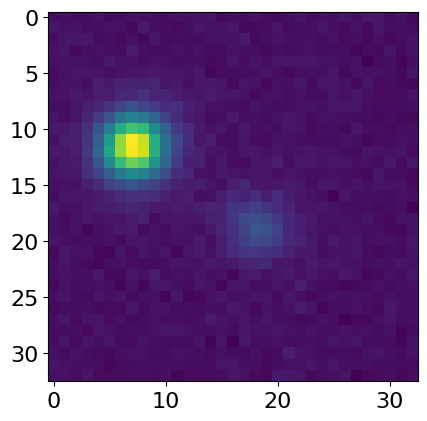

In [83]:
img, prop = config_handler.draw_image(new_sample=True)
plt.imshow(img)

In [84]:
### IMPORT THE N_SERSIC COLUMN FROM SLSIM
# sources_file = pd.read_csv("data/sources.csv", index_col=0)
# sources_slsim_file = pd.read_csv("../../slsim/data/OM10/sources.csv", index_col=0)
# sources_file['n_sersic'] = sources_slsim_file['n_sersic']
# sources_file.to_csv("data/sources.csv")

In [85]:
### HOW MANY SYSTEMS DO WE HAVE
deflectors_file = pd.read_csv('data/deflectors.csv', index_col=0)
print(len(deflectors_file))
deflectors_file

1353


,LENSID,FLAGTYPE,NIMG,ZLENS,VELDISP,ELLIP,PHIE,GAMMA,PHIG,ZSRC,...,halo_mass_log,EINSTEIN,e1_mass,e2_mass,e1_light,e2_light,gamma1,gamma2,gamma_lens,n_sersic
3,31148653,0,2,1.016,280.5434,0.281612,91.638680,0.049493,-28.94337,2.05,...,13.404356,0.823867,-0.163613,-0.009369,-0.305842,-0.017513,0.026310,-0.041920,1.941781,4.001318
4,350831,0,2,0.186,209.8940,0.162288,-129.310700,0.023032,113.06560,1.78,...,12.352448,1.069203,-0.017423,0.086574,-0.033883,0.168365,-0.015962,-0.016605,1.824619,3.999065
5,4789516,0,2,0.476,221.8196,0.073489,148.768700,0.032160,67.83229,1.29,...,12.199332,0.768551,0.017636,-0.033825,0.038469,-0.073780,-0.023003,0.022476,2.101335,4.000691
7,1215224,0,4,0.288,233.8837,0.340546,-136.346400,0.033537,-39.73777,2.92,...,12.291071,1.286778,0.009641,0.204989,0.015469,0.328898,0.006126,-0.032973,2.062055,3.999670
9,10798336,0,2,0.652,203.2357,0.461355,-16.851680,0.056664,55.53548,1.32,...,14.522403,0.489150,0.249448,-0.166382,0.397055,-0.264836,-0.020372,0.052875,1.932160,3.999345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,5430094,0,2,0.500,165.5770,0.242544,-161.220000,0.028065,129.85400,2.21,...,12.120437,0.516909,0.109401,0.084129,0.170637,0.131218,-0.005014,-0.027614,2.103310,3.999916
2804,5337421,0,2,0.496,228.0342,0.264508,-0.344299,0.040356,-138.16740,2.55,...,12.854919,1.020315,0.152400,-0.001832,0.265482,-0.003191,0.004453,0.040110,1.873980,3.999716
2809,21219638,0,2,0.860,296.4831,0.058690,8.432822,0.071142,-43.29349,2.68,...,13.516719,1.293439,0.028932,0.008771,0.042378,0.012848,0.004235,-0.071016,2.164554,4.001659
2811,32385282,0,2,1.034,225.9436,0.036238,-25.338560,0.031332,105.66190,2.92,...,13.086989,0.677326,0.011694,-0.014275,0.022323,-0.027251,-0.026765,-0.016289,2.143564,3.999365


In [114]:
command = f'python3 ../paltas/generate.py {config_file}.py generated_images/test/5_year_coadd_nosrc_light --n {len(deflectors_file) - 1} --tf_record'
command

'python3 ../paltas/generate.py config_LSST_catalog.py generated_images/test/5_year_coadd_nosrc_light --n 1352 --tf_record'

In [115]:
os.system(command = command)


/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Save folder path: generated_images/test/5_year_coadd_nosrc_light
config_LSST_catalog.py


  0%|          | 0/1352 [00:00<?, ?it/s]/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Configs/config_handler.py:383: RuntimeWarning: Parameter (psf_parameters, kernel_point_source) in config_dict, and possibly others, will not be written to metadata.csv
  warnings.warn(
 15%|█▌        | 205/1352 [00:00<00:00, 2048.61it/s]

Dataset generation complete. Acceptance rate: 1.000
Saving 1352 files into the tf record


100%|██████████| 1352/1352 [00:00<00:00, 1975.74it/s]


0

### Making image collages for different preparations

In [140]:
desired_prep = '5_year_coadd_nosrc_light'

In [141]:
### LOAD IN THE METADATA FOR THE DESIRED PREPARATION
testdf = pd.read_csv(f"generated_images/test/{desired_prep}/metadata.csv")
testdf

,cosmology_parameters_cosmology_name,detector_parameters_background_noise,detector_parameters_ccd_gain,detector_parameters_exposure_time,detector_parameters_magnitude_zero_point,detector_parameters_num_exposures,detector_parameters_pixel_scale,detector_parameters_read_noise,detector_parameters_sky_brightness,lens_light_parameters_R_sersic,...,seed,source_parameters_R_sersic,source_parameters_center_x,source_parameters_center_y,source_parameters_e1,source_parameters_e2,source_parameters_mag_app,source_parameters_n_sersic,source_parameters_output_ab_zeropoint,source_parameters_z_source
0,planck18,NaN,2.3,15,27,150,0.2,10,20.48,0.993717,...,3115294939,0.710737,-0.278961,0.039378,-0.005237,0.003489,20.746082,4.001182,27,0.859073
1,planck18,NaN,2.3,15,27,150,0.2,10,20.48,1.409657,...,[3115294940],1.253785,1.247136,-0.167503,-0.019414,-0.053802,23.738365,3.999516,27,2.097466
2,planck18,NaN,2.3,15,27,150,0.2,10,20.48,1.415917,...,[3115294941],0.269096,-0.732594,-0.653421,-0.192665,0.128253,23.386660,4.000752,27,2.131278
3,planck18,NaN,2.3,15,27,150,0.2,10,20.48,1.108221,...,[3115294942],0.495057,-0.966001,-0.147441,-0.029895,0.121125,24.654272,3.999509,27,2.250301
4,planck18,NaN,2.3,15,27,150,0.2,10,20.48,1.437436,...,[3115294943],0.636477,0.260890,0.308573,0.024040,0.031478,23.522800,4.000003,27,2.015792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,planck18,NaN,2.3,15,27,150,0.2,10,20.48,1.421572,...,[3115296286],0.458154,-0.325966,-0.464431,0.160078,-0.272004,21.859688,4.000132,27,1.480423
1348,planck18,NaN,2.3,15,27,150,0.2,10,20.48,0.821532,...,[3115296287],0.444751,-0.180802,-0.019433,-0.019933,-0.017954,25.637943,4.000360,27,2.465731
1349,planck18,NaN,2.3,15,27,150,0.2,10,20.48,0.656332,...,[3115296288],0.725692,-0.394537,-0.021535,0.097195,0.157683,22.854586,4.001393,27,2.017539
1350,planck18,NaN,2.3,15,27,150,0.2,10,20.48,0.497209,...,[3115296289],0.939450,0.326904,-0.265451,-0.139216,0.010464,21.219934,4.001594,27,0.877216


In [132]:
testdf[testdf['point_source_parameters_num_images'] ==1]
### SUCCESSSSSSS

,cosmology_parameters_cosmology_name,detector_parameters_background_noise,detector_parameters_ccd_gain,detector_parameters_exposure_time,detector_parameters_magnitude_zero_point,detector_parameters_num_exposures,detector_parameters_pixel_scale,detector_parameters_read_noise,detector_parameters_sky_brightness,lens_light_parameters_R_sersic,...,seed,source_parameters_R_sersic,source_parameters_center_x,source_parameters_center_y,source_parameters_e1,source_parameters_e2,source_parameters_mag_app,source_parameters_n_sersic,source_parameters_output_ab_zeropoint,source_parameters_z_source


In [119]:
### DON'T RUN THIS CELL -- THIS HAS THE FILES SAVED ... HMM BUT THAT DOESN'T MEAN THE INDEX WILL MATCH . UGH
# picked_lens_objects = testdf.sample(24)['obj_index']

In [142]:
# array([  69,  190, 1006, 2398,  533, 1548, 2759,  126, 2662, 1680, 1191,
#    1350, 1000, 2196, 1951,  967, 1970, 1851, 2281, 2666,  616, 2508,
#    2560, 2011])
np.array(picked_lens_objects)

array([  69,  190, 1006, 2398,  533, 1548, 2759,  126, 2662, 1680, 1191,
       1350, 1000, 2196, 1951,  967, 1970, 1851, 2281, 2666,  616, 2508,
       2560, 2011])

In [143]:
pickeddf = testdf.loc[testdf['obj_index'].isin(picked_lens_objects)]
pickeddf_sorted = pd.DataFrame()
for i in picked_lens_objects:
    ithrow = pickeddf[pickeddf['obj_index']==i]
    pickeddf_sorted = pd.concat((pickeddf_sorted, ithrow))

In [144]:
pickeddf_sorted['obj_index']

489       69
475      190
125     1006
926     2398
755      533
1325    1548
322     2759
542      126
932     2662
1126    1680
450     1191
1183    1350
361     1000
787     2196
331     1951
336      967
180     1970
37      1851
753     2281
316     2666
946      616
1001    2508
91      2560
196     2011
Name: obj_index, dtype: int64

In [145]:
### RUN THIS CELL TO PICK FROM A NEW FOLDER
names = [str(i) for i in pickeddf_sorted.index]
picked_files = [f'generated_images/test/{desired_prep}/image_{"0"*(7-len(i)) + i}.npy' for i in names]

(372, 2976, 4)
(372, 2976, 4)


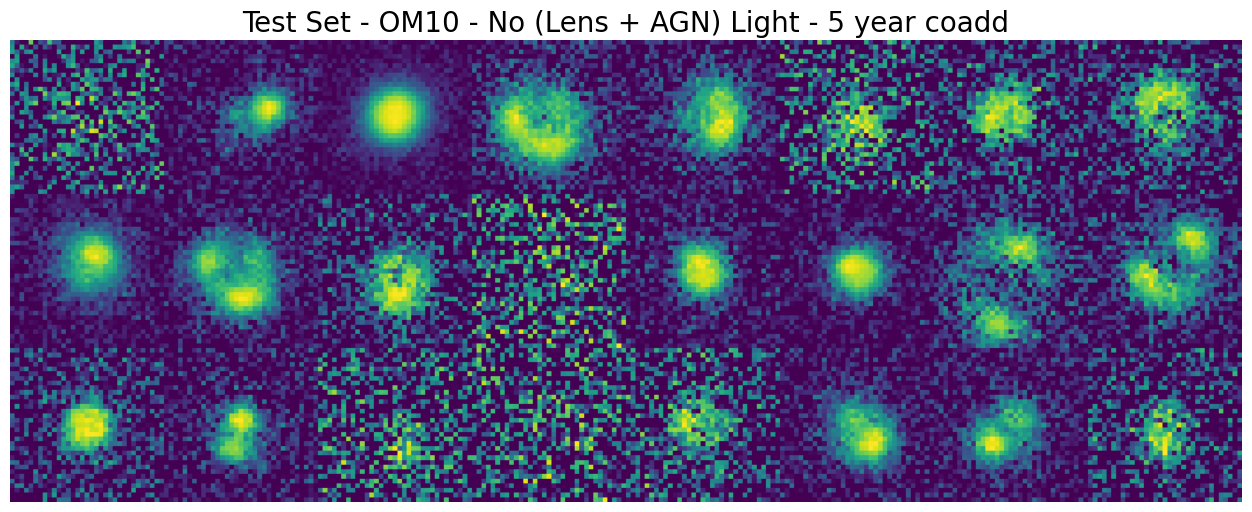

In [146]:
%matplotlib inline

visualization_utils.matrix_plot_from_npy(picked_files,names=names,dim=(3,8),
                                         save_name='lsst.png',stretch = 'asinh',asinh_a = 0.1,
                                         annotate=False)
plt.title("Test Set - OM10 - No (Lens + AGN) Light - 5 year coadd")
plt.show()
# visualization_utils.matrix_plot_from_npy(picked_files,names=picked_names,dim=(3,8),
#                                          save_name='lsst.png',asinh_a = 0.1, max_cut = 70, annotate=True)
# plt.show()
